# Text indexing pipeline

In [3]:
!pip install --upgrade gensim

We downloaded fse/word2vec-google-news-300 to convert our transcriptions into vector embeddings and placed it into our working directory.

In [14]:
# importing class(es)
from gensim.models import KeyedVectors
# instantiating model that maps words to embeddings
model = KeyedVectors.load('word2vec-google-news-300.model')

In [60]:
# importing preprocessing function
from gensim.utils import simple_preprocess
# function for generating embeddings
def generate_embeddings(fileName):
    # storing file in string
    inFile = open(fileName, 'r')
    txt = inFile.read()
    # tokenizing string
    words = simple_preprocess(txt)
    # generating embeddings using model
    embeddings = []
    for word in words:
        if word in model:
            embeddings.append(model[word])
    # flattens embeddings
    flattened_embeddings = []
    for e in embeddings:
        for v in e:
            flattened_embeddings.append(v)
    return flattened_embeddings[:16000]

In [71]:
import psycopg2 # database library
import os # directory work
import numpy as np # array work
# gets all text files in working directory
txt_files = [file for file in os.listdir(os.getcwd()) if file.endswith(".txt")]
# iterating through text files
for txt_file in txt_files:
    # generate embedding for text file
    embeddings = generate_embeddings(txt_file)
    # connecting to db
    connection = psycopg2.connect (
        host = "localhost",
        port = "5432",
        database = "youtube_video_search",
        user = "root",
        password = "root"
    )
    # instantiate cursor, insert into database, and commit changes
    cursor = connection.cursor()
    cursor.execute("INSERT INTO embeddings (name, embedding) VALUES (%s, %s)", (txt_file, np.array(embeddings).tolist()))
    connection.commit()

Proof that the text embeddings have been indexed in the database
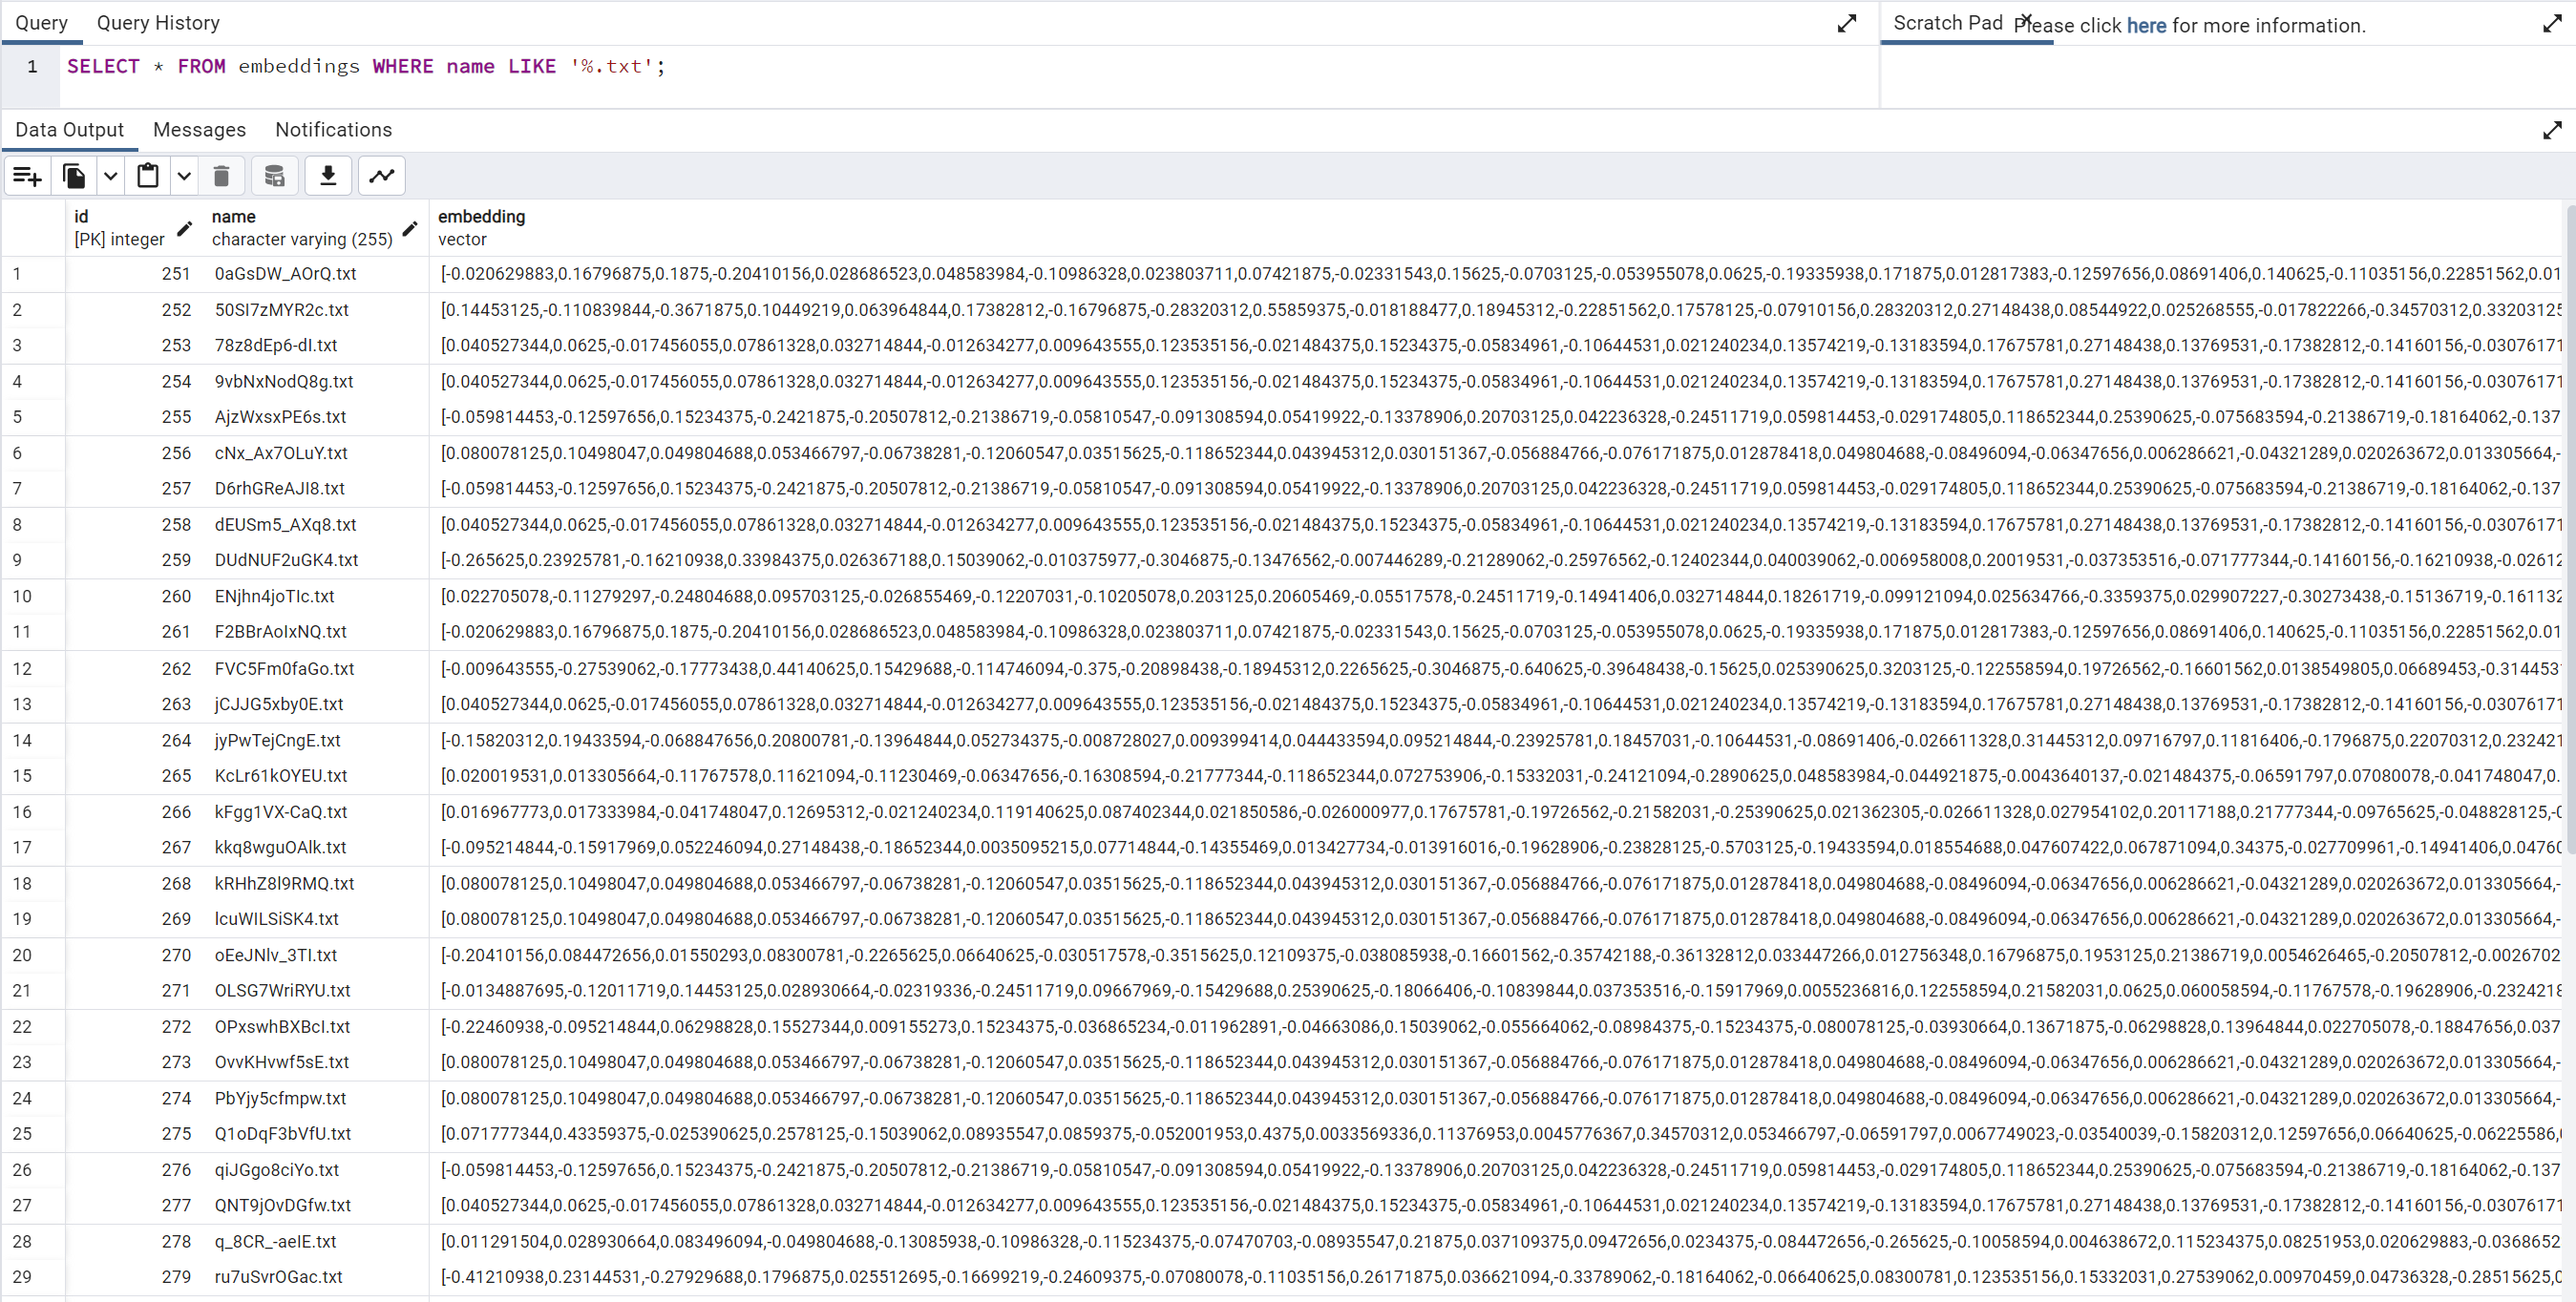